In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [38]:
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
raw_data = pd.read_csv("countries.csv")

In [41]:
raw_data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


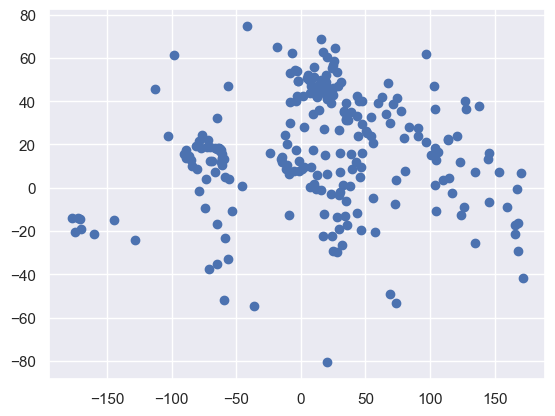

In [42]:
plt.scatter(raw_data['Longitude'], raw_data['Latitude'])


In [43]:
cluster_data = raw_data.iloc[:,[1,2]]

In [44]:
cluster_data

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


# Standardize the variables

In [45]:
ss = StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [46]:
cluster_data

,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683
...,...,...
236,-2.593510,-1.166941
237,0.464368,-0.047553
238,0.151237,-1.742328
239,0.188681,-1.155809


# Clustering

In [47]:
kmeans = KMeans(4)

In [48]:
kmeans.fit(cluster_data)

KMeans(n_clusters=4)

In [50]:
identified_clusters = kmeans.fit_predict(cluster_data)

In [51]:
identified_clusters

array([3, 1, 0, 3, 1, 1, 1, 1, 0, 1, 3, 0, 2, 0, 3, 2, 1, 1, 0, 1, 0, 0,
       2, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 1, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 3, 1, 3,
       2, 3, 2, 0, 3, 1, 3, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       2, 1, 1, 0, 1, 2, 3, 3, 2, 1, 1, 2, 1, 0, 1, 3, 1, 2, 0, 1, 1, 1,
       2, 3, 1, 1, 1, 0, 2, 3, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 3, 0, 0, 2,
       0, 2, 0, 2, 0, 3, 3, 1, 1, 1, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 1, 3,
       2, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 3, 1, 0,
       0, 1, 1, 0, 3, 1, 1, 1, 0, 3, 0, 1, 3, 0, 0, 2, 1, 1, 2, 3, 3, 1,
       1, 2, 0, 0, 1, 0, 3, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 0, 0])

In [52]:
new_data = raw_data.copy()

In [53]:
new_data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [55]:
new_data['clusterNo'] = identified_clusters

In [56]:
new_data

,name,Longitude,Latitude,clusterNo
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,3
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


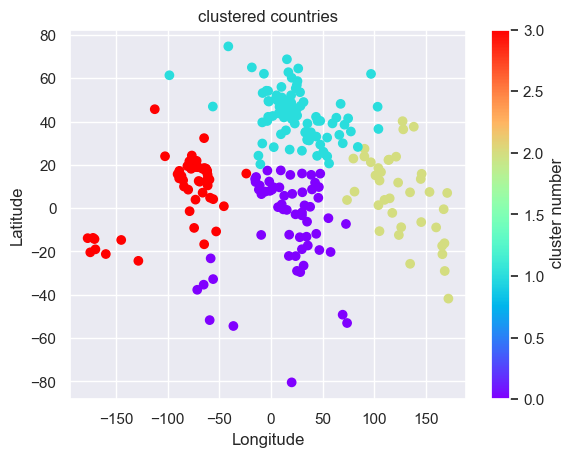

In [59]:
plt.scatter(new_data['Longitude'],new_data['Latitude'], c= new_data['clusterNo'], cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('clustered countries')
plt.colorbar(label = ' cluster number')
plt.show()

In [61]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Within-cluster Sum of Squares')

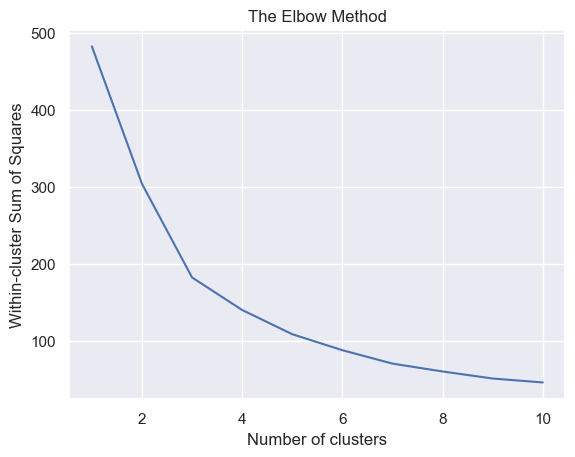

In [64]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')

In [65]:
wcss

[481.99999999999994,
 304.03529335762437,
 182.71427961732408,
 140.564818261609,
 109.20422047607421,
 88.48075009465327,
 71.11238276247357,
 60.914159590064116,
 51.77820270373302,
 46.70266791771601]